In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import os
import string
import tqdm
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import time

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.stem import WordNetLemmatizer
from nltk import wordnet
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
t = time.time()
print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 0 seconds


In [3]:
df= pd.read_csv('/kaggle/input/da-brexit/AnnotedBrexit.csv')
df

,text,target
0,在龙胜！\n,0
1,@Fenng 大冯啊。你没有觉得我帐号很帅。\n,0
2,其实我上来一次很不容易，有朋友说对我的ID感兴趣。虽然这是我无法割舍的帐号，但是每个人都是有...,0
3,还有。为什么我的头像被换成了个鸡蛋。太坏了吧\n,0
4,Why is always someone trying to crack my passw...,0
...,...,...
371980,@BenDunnell @Woodpoliticshef @christopherhope ...,0
371981,@littlemacaron have you ever driven through Ea...,0
371982,"RT @undertheraedar: ""From Anscombe's quartet t...",1
371983,"Cabinet Office minister, John Penrose, suggest...",0


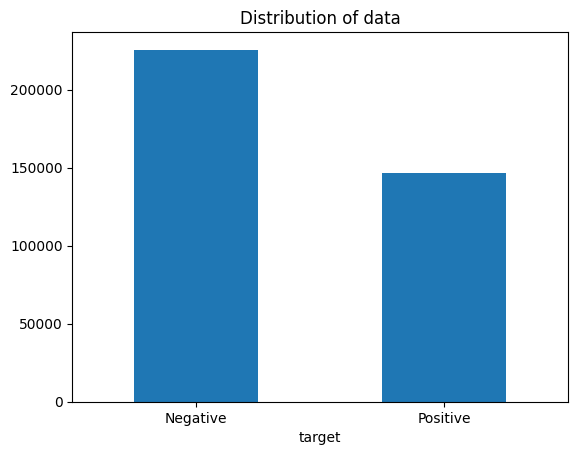

In [4]:

# Removing the unnecessary columns.
df = df[['text','target']]
# Replacing the values to ease understanding.
# dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax =df.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

# Preprocessing technique

In [5]:
contractions = { 
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
}

In [6]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))

def expand_contractions(text,contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews

In [7]:
def remove_URL(text):
    text=str(text)
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_mentions(text):
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    return ment.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [8]:

t = time.time()

df['clean_text'] = df['text'].apply(lambda x: remove_URL(x))
df['clean_text'] = df['clean_text'].apply(lambda x: expand_contractions(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_emoji(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_html(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_mentions(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punct(x))
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())

print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 19 seconds


In [9]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.remove('not')
stop_words.add('rt')

In [10]:
cleaned = df['clean_text'].tolist()

for i,text in enumerate(cleaned):
    splits = text.split()
    splits = [word for word in splits if word not in stop_words]
    cleaned[i]=' '.join(splits)
    
df['clean_text']=cleaned

## <a name="p4">Analysing the data</a>
Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot **Word Clouds** for **Positive and Negative** tweets from our dataset and see which words occur the most.

In [11]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['clean_text'][pred_df['target'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

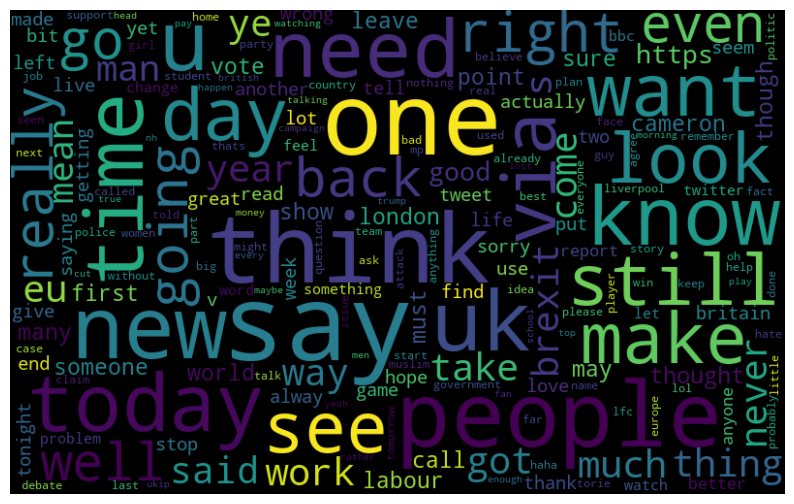

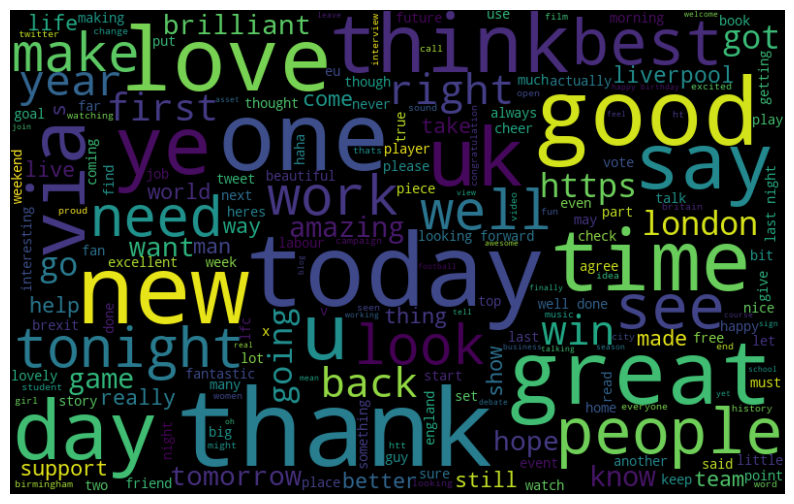

In [12]:
for i in df.target.unique():
    word_cloud(df,i)

## <a name="p5">Splitting the Data</a>
The Preprocessed Data is divided into 2 sets of data: 
* **Training Data:** The dataset upon which the model would be trained on. Contains 80% data.
* **Test Data:** The dataset upon which the model would be tested against. Contains 20% data.

In [13]:
x=df['clean_text']
y=df["target"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(297588,) (74397,) (297588,) (74397,)


In [16]:
def tokenize_and_stemmed(text):
    # Changing case of the text to lower case
    lowered = text.lower()
    
    # Cleaning the text
    cleaned = re.sub('@user', '', lowered)
    
    # Tokenization
    tokens = word_tokenize(cleaned)
    filtered_tokens = [token for token in tokens if re.match(r'\w{1,}', token)]
    
    # Stemming
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in filtered_tokens]
    return stems

In [17]:
t = time.time()
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stemmed,ngram_range=(1,2),
                                   max_features=500000, stop_words='english')
X_train_tweets_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tweets_tfidf = tfidf_vectorizer.transform(X_test)
print(X_train_tweets_tfidf.shape, X_test_tweets_tfidf.shape)

print(f'Time Taken: {round(time.time()-t)} seconds')

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

(297588, 500000) (74397, 500000)
Time Taken: 189 seconds


In [18]:
X_train=X_train_tweets_tfidf
X_test=X_test_tweets_tfidf

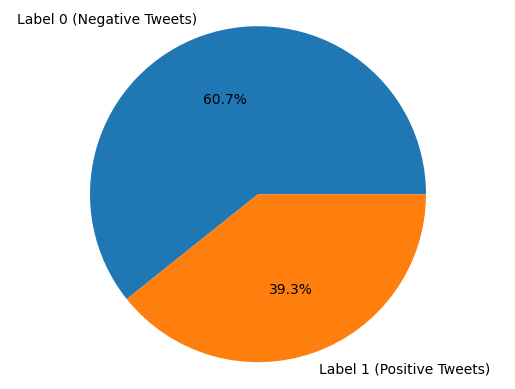

In [19]:
# Class Imbalance Check
plt.pie(pd.value_counts(y_train), 
        labels=['Label 0 (Negative Tweets)', 'Label 1 (Positive Tweets)'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

## <a name="p8">Creating and Evaluating Models</a>

We're creating 3 different types of model for our sentiment analysis problem: 
* **Bernoulli Naive Bayes (BernoulliNB)**
* **Linear Support Vector Classification (LinearSVC)**
* **Logistic Regression (LR)**

Since our dataset is not **skewed**, i.e. it has equal number of **Positive and Negative** Predictions. We're choosing **Accuracy** as our evaluation metric. Furthermore, we're plotting the **Confusion Matrix** to get an understanding of how our model is performing on both classification types.

### Evaluate Model Function

In [20]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [21]:
# Functions to print scores
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: Accuracy={acc}, F1-Score={f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores: Accuracy={acc}, F1-Score={f1}')

### <a name="p8-2">LinearSVC Model</a>

Training Scores: Accuracy=0.957, F1-Score=0.944
Validation Scores: Accuracy=0.777, F1-Score=0.704
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     44847
           1       0.75      0.67      0.70     29550

    accuracy                           0.78     74397
   macro avg       0.77      0.76      0.76     74397
weighted avg       0.78      0.78      0.77     74397



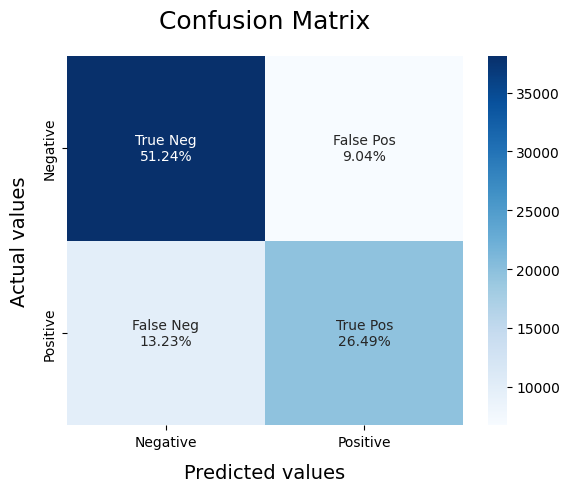

In [22]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_train_pred = SVCmodel.predict(X_train)
y_test_pred = SVCmodel.predict(X_test)
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)
model_Evaluate(SVCmodel)

### <a name="p8-3">Logistic Regression Model</a>

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training Scores: Accuracy=0.882, F1-Score=0.839
Validation Scores: Accuracy=0.786, F1-Score=0.709
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     44847
           1       0.77      0.66      0.71     29550

    accuracy                           0.79     74397
   macro avg       0.78      0.76      0.77     74397
weighted avg       0.78      0.79      0.78     74397



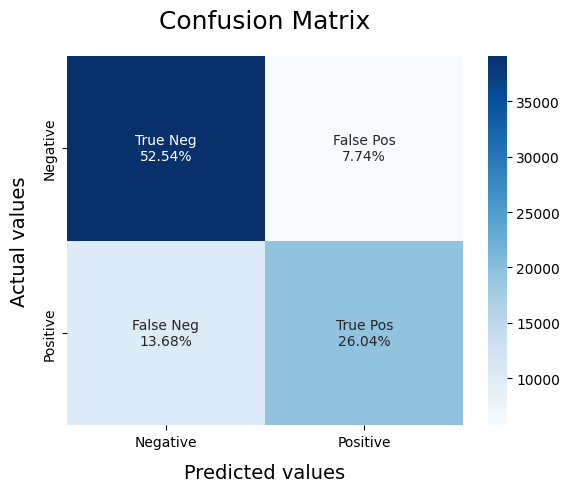

In [23]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_train_pred = LRmodel.predict(X_train)
y_test_pred =LRmodel.predict(X_test)
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)
model_Evaluate(LRmodel)

In [24]:
# SMOTE to deal with the class imbalance
t = time.time()

smote = SMOTE(n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tweets_tfidf, y_train.values)
print(X_train_smote.shape, y_train_smote.shape)

print(f'Time Taken: {round(time.time()-t)} seconds')

(361472, 500000) (361472,)
Time Taken: 1885 seconds


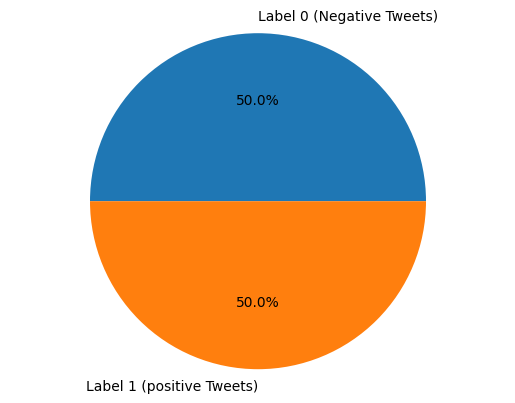

In [25]:
# Class Imbalance Check
plt.pie(pd.value_counts(y_train_smote), 
        labels=['Label 0 (Negative Tweets)', 'Label 1 (positive Tweets)'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [26]:
X_train=X_train_smote
y_train=y_train_smote

In [27]:
t = time.time()

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
print(LRmodel.score(X_test, y_test))
y_train_pred = LRmodel.predict(X_train)
y_test_pred =LRmodel.predict(X_test)
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)
# model_Evaluate(LRmodel)

print(f'Time Taken: {round(time.time()-t)} seconds')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.7734317243974892
Training Scores: Accuracy=0.894, F1-Score=0.895
Validation Scores: Accuracy=0.773, F1-Score=0.715
Time Taken: 26 seconds


In [28]:
t = time.time()

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_train_pred = SVCmodel.predict(X_train)
y_test_pred = SVCmodel.predict(X_test)
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)
# model_Evaluate(SVCmodel)

print(f'Time Taken: {round(time.time()-t)} seconds')

Training Scores: Accuracy=0.957, F1-Score=0.958
Validation Scores: Accuracy=0.766, F1-Score=0.702
Time Taken: 4 seconds


In [30]:
t = time.time()

# Extreme Gradient Boosting Classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
training_scores(y_train, y_train_pred)
validation_scores(y_test, y_test_pred)
# model_Evaluate(xgb)


print(f'Time Taken: {round(time.time()-t)} seconds')

Training Scores: Accuracy=0.722, F1-Score=0.663
Validation Scores: Accuracy=0.723, F1-Score=0.573
Time Taken: 133 seconds


In [31]:
t = time.time()

reg = LinearRegression()
reg.fit(X_train, y_train)
# model_Evaluate(reg)

print(f'Time Taken: {round(time.time()-t)} seconds')

Time Taken: 477 seconds


In [32]:
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.intercept_)

-1.18831512698902
[-7.79917948e-01  7.34158525e-01  1.36659188e+00 ...  1.55245069e-01
 -8.37197416e-02  4.37213783e-04]
0.8246645909462014


# Save model

In [ ]:
file = open('vectoriser.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('brexit-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('brexit-SVC.pickle','wb')
pickle.dump(SVC, file)
file.close()

file = open('brexit-rf.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('brexit-xgb.pickle','wb')
pickle.dump(xgb, file)
file.close()


file = open('brexit-reg.pickle','wb')
pickle.dump(reg, file)
file.close()



In [ ]:
# def load_models():
#     '''
#     Replace '..path/' by the path of the saved models.
#     '''
    
#     # Load the vectoriser.
#     file = open('..path/vectoriser.pickle', 'rb')
#     vectoriser = pickle.load(file)
#     file.close()
#     # Load the LR Model.
#     file = open('..path/Sentiment-LRv1.pickle', 'rb')
#     LRmodel = pickle.load(file)
#     file.close()
    
#     return vectoriser, LRmodel

# def predict(vectoriser, model, text):
#     # Predict the sentiment
#     textdata = vectoriser.transform(preprocess(text))
#     sentiment = model.predict(textdata)
    
#     # Make a list of text with sentiment.
#     data = []
#     for text, pred in zip(text, sentiment):
#         data.append((text,pred))
        
#     # Convert the list into a Pandas DataFrame.
#     df = pd.DataFrame(data, columns = ['text','sentiment'])
#     df = df.replace([0,1], ["Negative","Positive"])
#     return df

# if __name__=="__main__":
#     # Loading the models.
#     #vectoriser, LRmodel = load_models()
    
#     # Text to classify should be in a list.
#     text = ["I hate twitter",
#             "May the Force be with you.",
#             "Mr. Stark, I don't feel so good"]
    
#     df = predict(vectoriser, LRmodel, text)
#     print(df.head())